In [1]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import zipfile
import json


In [2]:
#get portion of data
def df_sample(dataframe, num_rows):
    if not dataframe.head().empty:
        return dataframe.sample(num_rows)
    else:
        return "Your dataframe does not exist! Check your dataframe variable."

#get information
def df_info(dataframe):
    if not dataframe.empty:
        return dataframe.info() 
    else:
        return "There is an issue with your dataframe! Check your dataframe variable."

#get shape
def df_shape(dataframe):
    if dataframe.shape == (0,0):
        return "Your dataframe does not exist! Check your dataframe variable."
    else:
        return dataframe.shape

#decribe dataframe
def describe_df(dataframe, categorical=False):
    if not dataframe.empty:
        if categorical == False:
            return dataframe.describe()
        else:
            return dataframe.describe(include='O')
    else:
        return "Your dataframe does not exist! Check your dataframe variable."


#get columns
def get_columns(dataframe):
    list_length = len(dataframe.columns)
    if list_length >= 0:
        return dataframe.columns
    else:
        return "There are no columns in your dataframe! Check your dataframe variable."

#get column data
def column_data(dataframe, column_name: str):
    if column_name in get_columns(dataframe):
        return dataframe[column_name]
    else:
        return "Your dataframe or column does not exist! Check your dataframe variable and columns."

#check nulls
def check_nulls(dataframe):
    num_nulls = dataframe.isnull().sum()
    percent_nulls = (num_nulls / len(dataframe) * 100).round(2)
    if not dataframe.empty:
        if num_nulls.sum() > 0:
            print(f"Here are the number of nulls per column: \n{num_nulls}")
            print(f"Here are the percent of nulls per column: \n{percent_nulls}")
        else:
            return "There are no nulls in your data."
    else:
        return "Your dataframe does not exist! Check your dataframe variable."

#check value counts
def unique(dataframe):
    if not dataframe.empty:
        return f"Here are the number of unique values per columns:", dataframe.nunique()


#check for dups
def check_dups(dataframe):
    num_dups = dataframe.duplicated().sum()
    if not dataframe.empty:
        return f"There are {num_dups} duplicates in your dataframe"
    else:
        return "Your dataframe does not exist! Check your dataframe variable."
    
#drop dups
def drop_dups(dataframe):
    dups = check_dups(dataframe)
    if dups == 0:
        return dataframe
    else:
        return dataframe.drop_duplicates()


#Visuals 

#make boxplots
def make_boxplot(dataframe, column):
    if not dataframe.empty:
        box = plt.boxplot(dataframe[column])
        plt.title(column)
        plt.show()
    

#make boxplots
def make_hist(dataframe, column):
    if not dataframe.empty:
        hist = plt.hist(dataframe[column])
        plt.title(column)
        plt.show()

#make pairplot
def make_pairplot(dataframe):
    return sns.pairplot(dataframe)

#make heatmap
def make_heatmap(dataframe, fig_size):
    fig = plt.figure(figsize=fig_size)
    correlation = dataframe.corr(numeric_only=True)
    sns.heatmap(correlation, cmap='coolwarm', annot=True)
    return plt.show()

#make scatter plot
def make_scatter(dataframe, x_column, y_column, title: str, x_label: str, y_label: str):
    plt.scatter(x=dataframe[x_column], y=dataframe[y_column])
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    return plt.show()

# Initial EDA

In [2]:
#function to load data
def load_json_from_zip(zip_file_path, json_file_name):
    with zipfile.ZipFile(zip_file_path, 'r') as myzip:
        # Check if the JSON file exists in the ZIP archive
        if json_file_name in myzip.namelist():
            # Read the JSON data from the ZIP file
            with myzip.open(json_file_name) as json_file:
                data = json.load(json_file)
                # Create a pandas DataFrame from the JSON data
                df = pd.DataFrame(data)
                return df
        else:
            print(f"{json_file_name} not found in the ZIP archive.")
            return None

In [11]:
#declare paths
zip_file_path = 'data.zip'
file_name = 'data/raw_clean_data.json'

#load data
data = load_json_from_zip(zip_file_path, file_name)

In [4]:
#check for dups
check_dups(data)

'There are 0 duplicates in your dataframe'

In [5]:
check_nulls(data)

'There are no nulls in your data.'

In [6]:
df_sample(data, 5)

,Case_ID,Pid,Category,Category_id,Subcategory,Subcategory_id,Project_Country,Uid,Launched,Deadline,Project_Currency,Goal (USD),Pledged (USD),Backers (#),Status
373510,373511,162763606,Music,14,Music,14,European Union,2101272911,2015-09-30,2015-11-29,EUR,2119,95,3,Failed
142469,142470,1556931673,Dance,6,Spaces,256,United States of America,484742119,2014-07-28,2014-08-27,USD,15000,15622,139,Successful
414019,414020,1215479416,Film & Video,11,Documentary,30,United Kingdom,454117198,2019-08-18,2019-09-17,GBP,1215,1,1,Failed
63462,63463,146472135,Technology,16,Apps,332,United Kingdom,1464715700,2014-10-04,2014-11-03,GBP,57489,51,3,Failed
199682,199683,524722270,Film & Video,11,Horror,297,United States of America,1627736957,2017-09-29,2017-11-01,USD,9500,14493,143,Successful


In [6]:
df_info(data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506199 entries, 0 to 506198
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Case_ID           506199 non-null  int64 
 1   Pid               506199 non-null  int64 
 2   Category          506199 non-null  object
 3   Category_id       506199 non-null  int64 
 4   Subcategory       506199 non-null  object
 5   Subcategory_id    506199 non-null  int64 
 6   Project_Country   506199 non-null  object
 7   Uid               506199 non-null  int64 
 8   Launched          506199 non-null  object
 9   Deadline          506199 non-null  object
 10  Project_Currency  506199 non-null  object
 11  Goal (USD)        506199 non-null  int64 
 12  Pledged (USD)     506199 non-null  int64 
 13  Backers (#)       506199 non-null  int64 
 14  Status            506199 non-null  object
dtypes: int64(8), object(7)
memory usage: 57.9+ MB


In [8]:
unique(data)

('Here are the number of unique values per columns:',
 Case_ID             506199
 Pid                 506199
 Category                15
 Category_id             15
 Subcategory            161
 Subcategory_id         171
 Project_Country         15
 Uid                 400576
 Launched              4256
 Deadline              4208
 Project_Currency        15
 Goal (USD)           41992
 Pledged (USD)        49686
 Backers (#)           1000
 Status                   4
 dtype: int64)

In [6]:
#drop ID columns - not required and no duplicates or nulls
data = data.drop(['Case_ID', 'Pid', 'Category_id', 'Subcategory_id', 'Uid'], axis=1)

In [10]:
#summary stats for numerical data
describe_df(data)

,Goal (USD),Pledged (USD),Backers (#)
count,5.061990e+05,5.061990e+05,506199.000000
mean,4.195132e+04,1.079195e+04,60.305621
std,1.103406e+06,1.019046e+05,121.627346
min,0.000000e+00,0.000000e+00,0.000000
25%,2.000000e+03,4.500000e+01,2.000000
50%,5.000000e+03,7.480000e+02,15.000000
75%,1.500000e+04,4.510000e+03,64.000000
max,1.668777e+08,2.033899e+07,999.000000


In [11]:
#summary stats for categorical data
describe_df(data, categorical=True)

,Category,Subcategory,Project_Country,Launched,Deadline,Project_Currency,Status
count,506199,506199,506199,506199,506199,506199,506199
unique,15,161,15,4256,4208,15,4
top,Film & Video,Product Design,United States of America,2014-07-09,2014-08-08,USD,Failed
freq,75808,33193,370515,943,721,370515,309596


There is quite a big range for Goal and Pledged, but less so for Backers

Okay, We can see we have 15 unique categories, 161 unique subcategories, 15 unique Countries and Currencies - the latter can be dropped; 4 unique Status

Let's see if there is any independence among categories - omit Launched, Deadline, and Currency

H0: categories are independent of each other

H1: categories are not independent of each other

In [7]:
def check_independence(dataframe, cat1, cat2):
    contingency = pd.crosstab(dataframe[cat1], dataframe[cat2])
    stat, p, dof, expected = stats.chi2_contingency(contingency)
    alpha = 0.05
    if p < alpha:
        return f"Your p-value {p} is less than the alpha {alpha}. Reject the null hypothesis"
    else:
        return f"Your p-value {p} is greater to or equal to the alpha {alpha}. Reject the alternate hypothesis"

In [8]:
#test category and subcategory
check_independence(data, 'Category', 'Subcategory')

'Your p-value 0.0 is less than the alpha 0.05. Reject the null hypothesis'

In [10]:
#test category and country
check_independence(data, 'Category', 'Project_Country')

'Your p-value 0.0 is less than the alpha 0.05. Reject the null hypothesis'

In [11]:
#test category and status
check_independence(data, 'Category', 'Status')

'Your p-value 0.0 is less than the alpha 0.05. Reject the null hypothesis'

In [12]:
#check Subcategory and Country
check_independence(data, 'Subcategory', 'Project_Country')

'Your p-value 0.0 is less than the alpha 0.05. Reject the null hypothesis'

In [17]:
#check for Subcategory and Status
check_independence(data, 'Subcategory', 'Status')

'Your p-value 0.0 is less than the alpha 0.05. Reject the null hypothesis'

In [18]:
#Check for Country adn Status
check_independence(data, 'Project_Country', 'Status')

'Your p-value 0.0 is less than the alpha 0.05. Reject the null hypothesis'

Before I look at outliers and histograms, I'm going to engineer some features that may be useful for my analysis

# Feature Enginneering

In [13]:
#get some data information first
# Convert Deadline and Launched to datetime
data['Deadline'] = pd.to_datetime(data['Deadline'])
data['Launched'] = pd.to_datetime(data['Launched'])

#calculate the duration of campaign in days
data['Duration (days)'] = (data['Deadline'] - data['Launched']).dt.days

#add columns for Year and Month

data['Year'] = data['Launched'].dt.year
data['Month'] = data['Launched'].dt.month_name()

In [14]:
#There are a lot of subcategories...I will do a frequency count, look at distribution then assign new categories
subcat_freq = (data['Subcategory'].value_counts() / len(data) * 100).round(2)

#map values to dataframe
data['Subcat_Freq'] = data['Subcategory'].map(subcat_freq)

In [15]:
#assign ordinal ranking to subcategory frequency based on percentiles
#1 = most common, 10 = least common

#create series
subcat_data = pd.Series(data['Subcat_Freq'])

#assign ranks
subcat_rank = subcat_data.rank(method='min', ascending=False)

#divide ranks into bins
subcat_bins = pd.cut(subcat_rank, bins=10, labels=range(1,11))

#to df and rename
subcat_bins = subcat_bins.to_frame()
subcat_bins = subcat_bins.rename(columns={'Subcat_Freq': 'Subcat_Rank'})

In [16]:
#merge dfs together
data = pd.merge(data, subcat_bins, left_index=True, right_index=True)

Features to look at competiton
- Competition - count at the ['Category', 'Subcategory', 'Project_Country', 'Month', 'Year'] level
- Campaign_Count = ['Category', 'Project_Country', 'Month', 'Year']
- Campaign_Country = ['Project_Country', 'Month', 'Year']
- Campaign_All = ['Month', 'Year']

In [17]:
#I can probably group some features together to provide an idea of competition 

# Group the data by the relevant features and count the number of rows in each group 
campaigns = data.groupby(['Category', 'Subcategory', 'Project_Country', 'Month', 'Year']).size()

# Rename the column to 'Campaigns'
campaigns = campaigns.rename('Competition')

# Reset the index to make the result a data frame
campaigns = campaigns.reset_index()

# Create a dictionary from the campaigns data frame, using the common columns as the key and the Campaigns column as the value
campaigns_dict = dict(zip(campaigns[['Category', 'Subcategory', 'Project_Country', 'Month', 'Year']].itertuples(index=False, name=None), campaigns['Competition']))

# Map the dictionary to the data data frame, using the same common columns as the key
data['Competition'] = data[['Category', 'Subcategory', 'Project_Country', 'Month', 'Year']].apply(lambda x: campaigns_dict.get(tuple(x)), axis=1)

In [18]:
# get total campaign by Category, Project Country, Month and Year
campaign_cat =data.groupby(['Category', 'Project_Country', 'Month', 'Year']).size()

#rename column
campaign_cat = campaign_cat.rename('Campaign_Count')

#reset index
campaign_cat = campaign_cat.reset_index()

#map to original dataframe

# Create a dictionary from the campaigns data frame, using the common columns as the key and the Campaigns column as the value
campaigns_dict = dict(zip(campaign_cat[['Category', 'Project_Country', 'Month', 'Year']].itertuples(index=False, name=None), campaign_cat['Campaign_Count']))

# Map the dictionary to the data data frame, using the same common columns as the key
data['Campaign_Count'] = data[['Category', 'Project_Country', 'Month', 'Year']].apply(lambda x: campaigns_dict.get(tuple(x)), axis=1)


In [19]:
#get total campaign by Project Country, Month, and Year
campaign_country = data.groupby(['Project_Country', 'Month', 'Year']).size()

#rename column
campaign_country = campaign_country.rename('Campaign_Country')

#reset index
campaign_country = campaign_country.reset_index()

#map to original dataframe

# Create a dictionary from the campaigns data frame, using the common columns as the key and the Campaigns column as the value
campaigns_dict = dict(zip(campaign_country[['Project_Country', 'Month', 'Year']].itertuples(index=False, name=None), campaign_country['Campaign_Country']))

# Map the dictionary to the data data frame, using the same common columns as the key
data['Campaign_Country'] = data[['Project_Country', 'Month', 'Year']].apply(lambda x: campaigns_dict.get(tuple(x)), axis=1)

In [20]:
# get all campaigns per month and Year
campaign_all = data.groupby(['Month', 'Year']).size()

#rename column
campaign_all = campaign_all.rename('Campaign_All')

#reset index
campaign_all = campaign_all.reset_index()

#map to original dataframe

# Create a dictionary from the campaigns data frame, using the common columns as the key and the Campaigns column as the value
campaigns_dict = dict(zip(campaign_all[['Month', 'Year']].itertuples(index=False, name=None), campaign_all['Campaign_All']))

# Map the dictionary to the data data frame, using the same common columns as the key
data['Campaign_All'] = data[['Month', 'Year']].apply(lambda x: campaigns_dict.get(tuple(x)), axis=1)

Revenu stuff

In [23]:
#revenue per campaign

#function to get revenue per campaign
# need to calculate fees collected provided campaign is successful

# Kickstarter takes 5% 

def calculate_revenue(pledged, status, fee=0.05):
    return np.where(status == 'Successful', fee * pledged, 0)

In [24]:
#new feature showing revenue generated from campaign
data['Campaign_Revenue'] = calculate_revenue(data['Pledged (USD)'], data['Status'])

Pledged related features

In [25]:
#calculate revenue or pledged per backer
def amount_per_backer(amount, backers):
    return np.where(backers > 0, amount / backers, 0)


def amount_per_day(amount, duration):
    return np.where(duration > 0, (amount / duration).round(2), 0)

In [31]:
#pledge per backer
data['Pledge_per_Backer'] = amount_per_backer(data['Pledged (USD)'], data['Backers (#)'])

#pledge per day
data['Pledge_per_Day'] = amount_per_day(data['Pledged (USD)'], data['Duration (days)'])


In [32]:
#round some new features to two decimal places
data['Pledge_per_Backer'] = data['Pledge_per_Backer'].round(2)
data['Pledge_per_Day'] = data['Pledge_per_Day'].round(2)

# Exploratory Data Analysis

In [35]:
data

,Category,Subcategory,Project_Country,Launched,Deadline,Project_Currency,Goal (USD),Pledged (USD),Backers (#),Status,...,Subcat_Rank,Competition,Campaign_Count,Campaign_Country,Campaign_All,Campaign_Revenue,Amount_Per_Backer,Amount_Per_Day,Pledge_per_Backer,Pledge_per_Day
0,Film & Video,Science Fiction,United States of America,1470873600000,1476057600000,USD,100000000,0,0,Failed,...,10,11,384,3123,4375,0.0,0.000000,0.00,0.00,0.00
1,Film & Video,Fantasy,United States of America,1576713600000,1581638400000,USD,100000000,85,4,Failed,...,10,3,128,1264,2344,0.0,21.250000,1.49,21.25,1.49
2,Technology,Software,Mexico,1488326400000,1490140800000,MXN,5219374,1,1,Failed,...,8,3,26,182,5278,0.0,1.000000,0.05,1.00,0.05
3,Publishing,Publishing,United States of America,1528070400000,1530748800000,USD,100000000,1,1,Failed,...,5,36,234,2377,3879,0.0,1.000000,0.03,1.00,0.03
4,Art,Illustration,Canada,1430438400000,1435622400000,CAD,80610122,0,0,Failed,...,6,2,32,398,7037,0.0,0.000000,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
506194,Publishing,Children's Books,United States of America,1407369600000,1409961600000,USD,1,0,0,Failed,...,5,97,620,5837,7565,0.0,0.000000,0.00,0.00,0.00
506195,Art,Conceptual Art,United States of America,1259107200000,1259884800000,USD,0,100,6,Successful,...,10,3,23,227,227,5.0,16.666667,11.11,16.67,11.11
506196,Publishing,Fiction,United States of America,1320624000000,1323734400000,USD,0,0,0,Canceled,...,4,80,271,2659,2659,0.0,0.000000,0.00,0.00,0.00
506197,Film & Video,Shorts,United States of America,1327449600000,1331856000000,USD,0,0,0,Failed,...,3,170,738,2977,2977,0.0,0.000000,0.00,0.00,0.00


In [ ]:
#return Launched and Deadline to datetime from unix timestamp
data['Launched'] = pd.to_datetime(data['Launched'], unit='ms').dt.date.astype(str)

#return Launched and Deadline to datetime from unix timestamp
data['Deadline'] = pd.to_datetime(data['Deadline'], unit='ms').dt.date.astype(str)



In [39]:
#drop columns - mistake from previous section
data.drop(['Amount_Per_Day', 'Amount_Per_Backer'], axis=1, inplace=True)

Explore Country and Status

In [40]:
#get count data
def get_counts(dataframe, column):
    new_df = pd.DataFrame(dataframe[column].value_counts())
    new_df.reset_index(inplace=True)
    new_df.rename(columns={'index': column, column: 'Count'}, inplace=True)
    return new_df

# function to graph counts
def graph_counts(dataframe, x_column, y_column, figsize=tuple):
    plt.figure(figsize=figsize)
    plt.bar(dataframe[x_column], dataframe[y_column])
    plt.xticks(rotation=45)
    plt.xlabel(x_column)
    plt.ylabel(y_column)
    plt.title(f"{x_column} {y_column}")
    plt.show()

In [41]:

#count of campaigns by Country
country_count = get_counts(data, 'Project_Country')

#count of campaigns by Status
status_count = get_counts(data, 'Status')

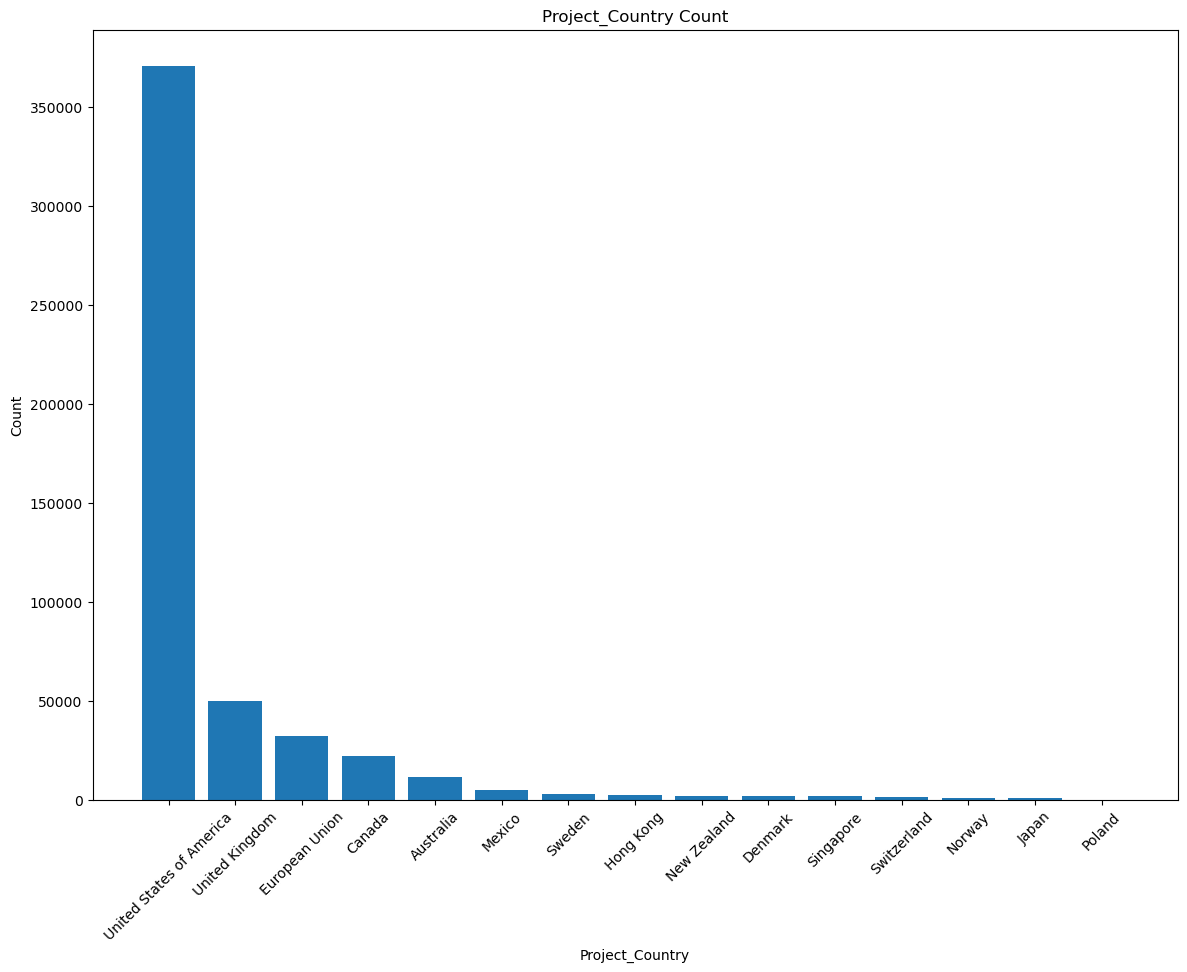

In [47]:
#graph campaign count by country
graph_counts(country_count, 'Project_Country', 'Count',  figsize=(14, 10))

The US UK, Europe, Canada, and Australia account for the majority of instances in the dataset.

I will add Sweden, Denmark, Switzerland, Norway, and Poland to the European Union count. I will also change the currency for these countries to Euro.

From the [Kickstarter website](https://help.kickstarter.com/hc/en-us/articles/115005127954-Can-I-choose-my-project-s-display-currency-#:~:text=Kickstarter%20does%20offer%20backers%20the%20option%20to%20set,currency%2C%20not%20in%20a%20backer%E2%80%99s%20preferred%20display%20currency.), the following is given
 > "It’s not possible to choose a preferred display currency for your project. By default, the currency your project will display and collect funds in is determined by the country of origin* you indicate when building your project. For example, if your banking and identity information are based in, say, Hong Kong, your project goal and reward costs will automatically be displayed in HKD. Once your project ends, the funds collected will be sent to you in HKD. If you’re in the UK, they’ll be in GBP, and so on. Kickstarter does offer backers the option to set a preferred display currency when browsing projects. However, pledges will always be collected in the project’s native currency, not in a backer’s preferred display currency. ***For projects launching from Denmark, Norway, Sweden, Switzerland, and Poland, creators now have the option to choose whether to run their project in their country’s native currency, or in Euros.***"

Given, European Union countries have a choice I will consolidate them to Euros and Europe as Europe already accounts for more campaigns than individual EU countries

In [42]:
#set dictionaries to replace values - Eurpope should change to European Union
euro_dict = {'Sweden': 'European Union', 'Denmark': 'European Union', 'Switzerland': 'European Union', 'Norway': 'European Union', 'Poland': 'European Union'}

#replace European countries with Europe and Euro, lose some granularity, but will be better
data['Project_Country'].replace(euro_dict, inplace=True)


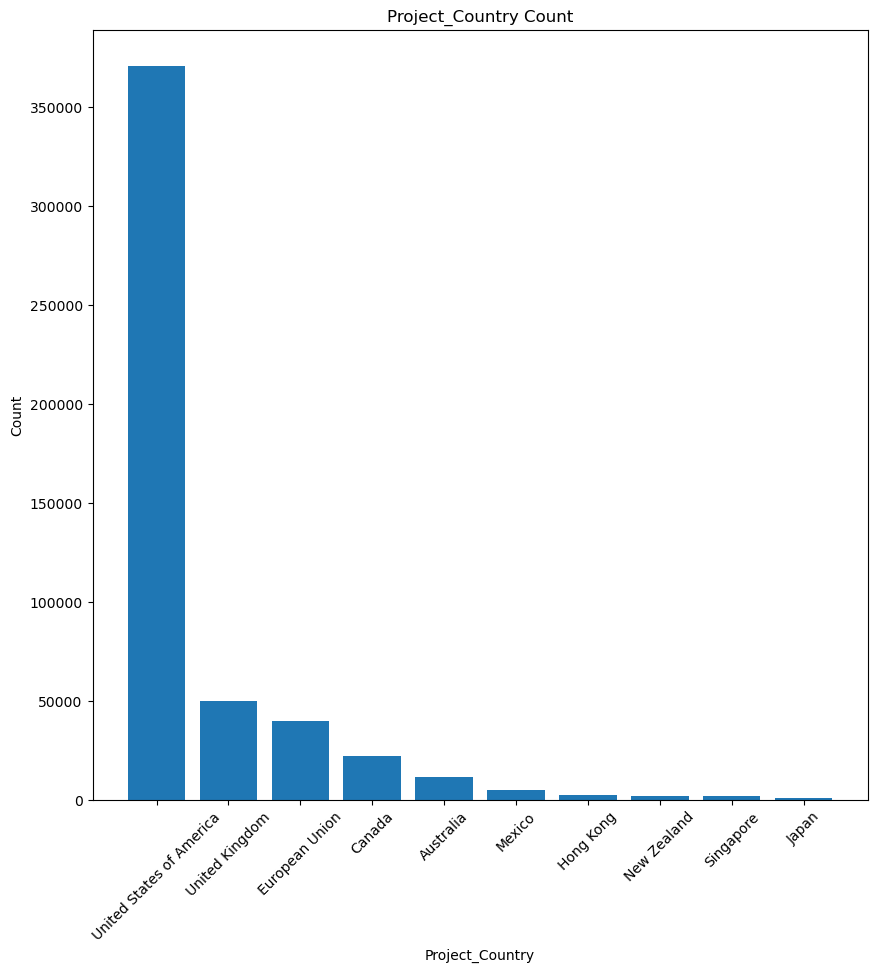

In [43]:
#regraph country counts
country_count = get_counts(data, 'Project_Country')
graph_counts(country_count, 'Project_Country', 'Count', (10, 10))

In [50]:
#percentage of total

percent_total = (data['Project_Country'].value_counts() / len(data) * 100).round(2)
percent_total

United States of America    73.20
United Kingdom               9.90
European Union               7.84
Canada                       4.36
Australia                    2.26
Mexico                       0.99
Hong Kong                    0.52
New Zealand                  0.42
Singapore                    0.35
Japan                        0.17
Name: Project_Country, dtype: float64

The US dominates the other countries and accounts for 73% of the data. This makes sense considering Kickstarter is an American company. 

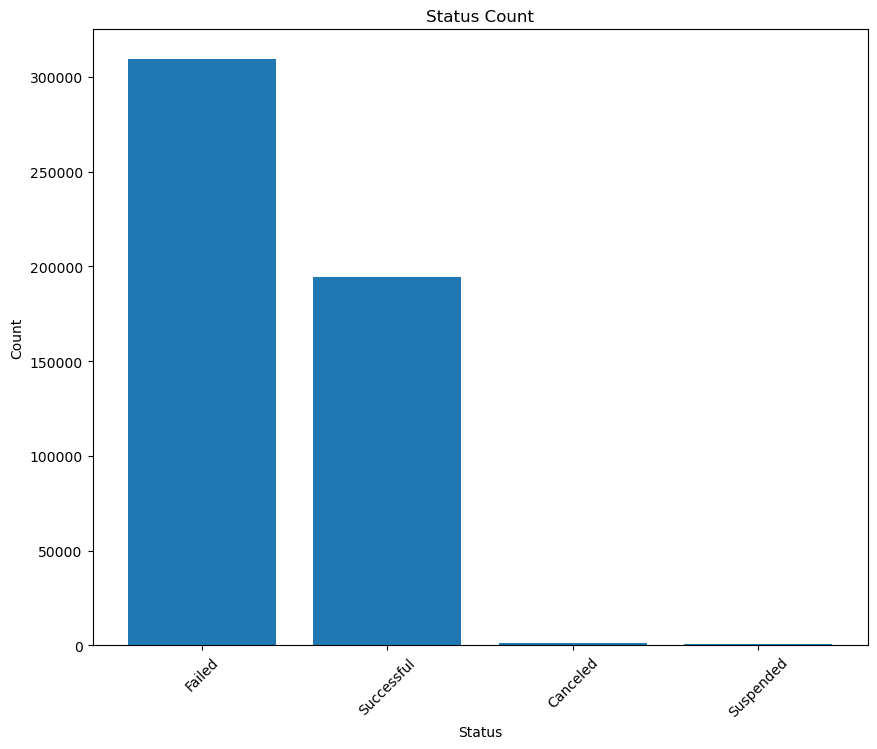

In [39]:
#graph campaign counts by Status
graph_counts(status_count, 'Status', 'Count', (10, 8))

In [44]:
#Replace Canceled and Suspended with Failed as I consider campaigns as successful or failed
data['Status'] = data['Status'].replace(['Canceled', 'Suspended'], 'Failed')

In [45]:
#count of campaigns by Status
status_count = get_counts(data, 'Status')

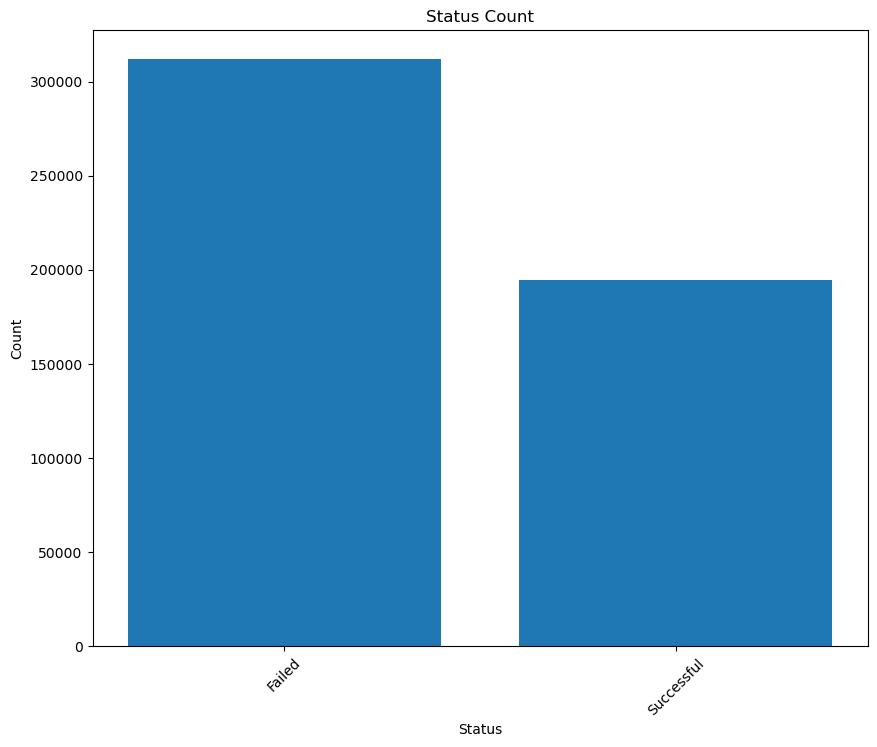

In [42]:
#graph campaign counts by Status
graph_counts(status_count, 'Status', 'Count', (10, 8))

# Outliers, Normalization, and Correlation Analysis

In [43]:
#describe numerical data
describe_df(data)

,Goal (USD),Pledged (USD),Backers (#),Duration (days),Year,Subcat_Freq,Subcat_Rank,Competition,Campaign_Count,Campaign_Country,Campaign_All,Campaign_Revenue,Pledge_per_Backer,Pledge_per_Day
count,5.061990e+05,5.061990e+05,506199.000000,506199.000000,506199.000000,506199.000000,506199.000000,506199.000000,506199.000000,506199.000000,506199.000000,5.061990e+05,506199.000000,506199.000000
mean,4.195132e+04,1.079195e+04,60.305621,34.082963,2015.360131,2.050135,5.424519,65.490289,275.270435,2556.847459,4561.539721,4.912317e+02,145.013189,349.466916
std,1.103406e+06,1.019046e+05,121.627346,12.857864,2.648268,1.782929,2.927792,75.599001,245.714338,1783.656719,1786.797729,5.080330e+03,1438.421168,3258.770248
min,0.000000e+00,0.000000e+00,0.000000,0.000000,2009.000000,0.000000,1.000000,1.000000,1.000000,1.000000,20.000000,0.000000e+00,0.000000,0.000000
25%,2.000000e+03,4.500000e+01,2.000000,30.000000,2013.000000,0.700000,3.000000,11.000000,63.000000,685.000000,3530.000000,0.000000e+00,15.000000,1.330000
50%,5.000000e+03,7.480000e+02,15.000000,30.000000,2015.000000,1.440000,5.000000,36.000000,213.000000,2562.000000,4157.000000,0.000000e+00,40.480000,24.140000
75%,1.500000e+04,4.510000e+03,64.000000,37.000000,2017.000000,2.740000,8.000000,96.000000,409.000000,3592.000000,5278.000000,1.500000e+02,78.170000,147.850000
max,1.668777e+08,2.033899e+07,999.000000,98.000000,2020.000000,6.560000,10.000000,689.000000,1540.000000,8447.000000,11023.000000,1.016949e+06,290556.940000,635593.310000


In [44]:
#describe categorical data
describe_df(data, categorical=True)

,Category,Subcategory,Project_Country,Launched,Deadline,Project_Currency,Status,Month
count,506199,506199,506199,506199,506199,506199,506199,506199
unique,15,161,10,4256,4208,15,2,12
top,Film & Video,Product Design,United States of America,2014-07-09,2014-08-08,USD,Failed,July
freq,75808,33193,370515,943,721,370515,311730,47490


In [45]:
def plot_feature(df, feature):
    # check if the feature is numeric
    if pd.api.types.is_numeric_dtype(df[feature]):
        # create a figure with two subplots
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
        # plot a histogram of the feature on the first subplot
        ax1.hist(df[feature])
        # set the title and labels for the first subplot
        ax1.set_title(f'Histogram of {feature}')
        ax1.set_xlabel(feature)
        ax1.set_ylabel('Frequency')
        # plot a box plot of the feature on the second subplot
        ax2.boxplot(df[feature])
        # set the title and labels for the second subplot
        ax2.set_title(f'Box plot of {feature}')
        ax2.set_xlabel(feature)
        ax2.set_ylabel('Value')
        # show the figure
        plt.show()
    else:
        # print an error message if the feature is not numeric
        print(f'{feature} is not a numeric feature.')

In [46]:
#get numeric features
numeric_features = data.select_dtypes(include='number')
numeric_columns = list(numeric_features.columns)


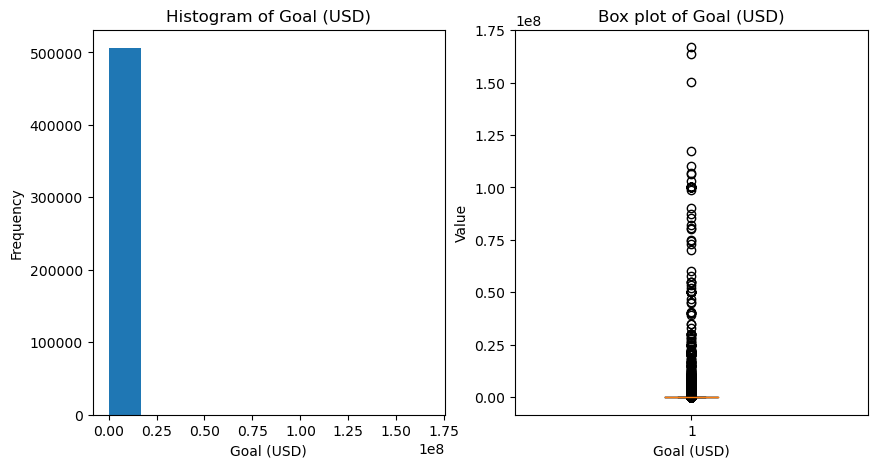

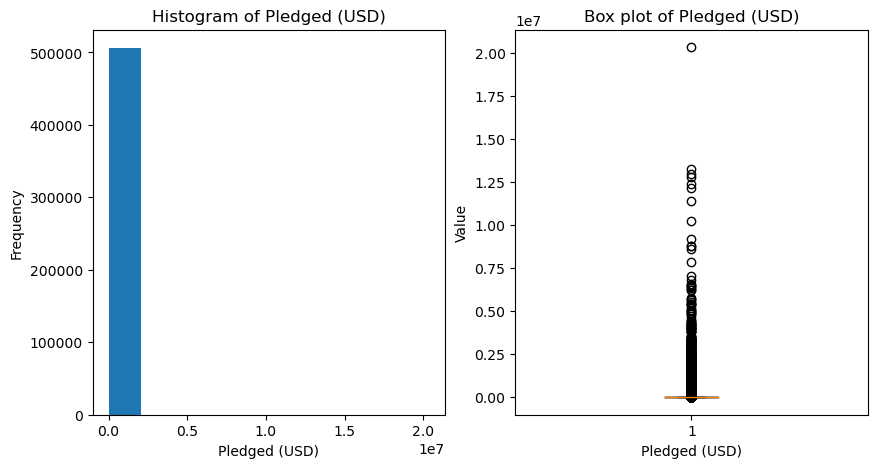

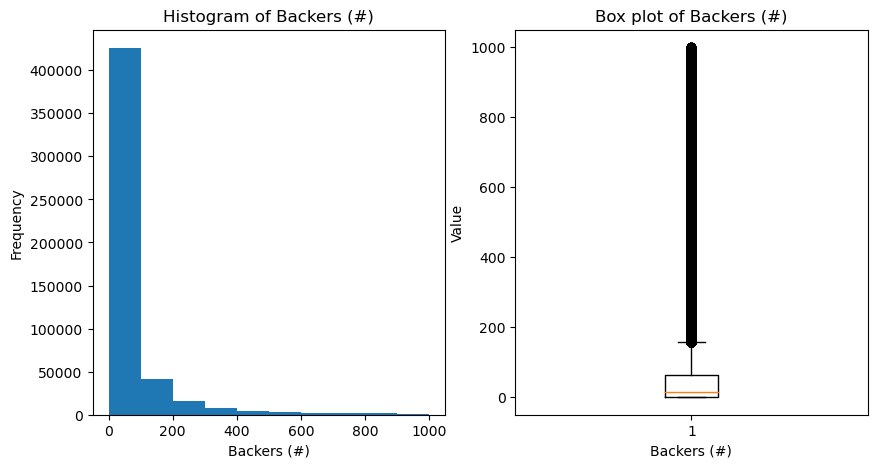

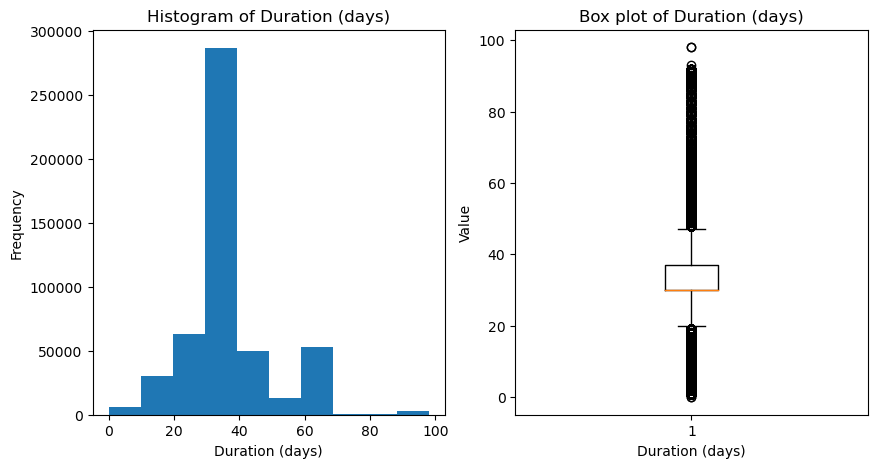

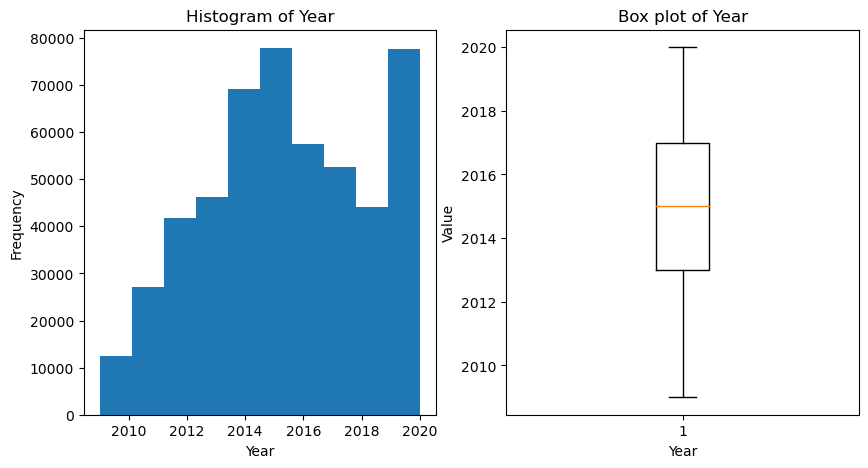

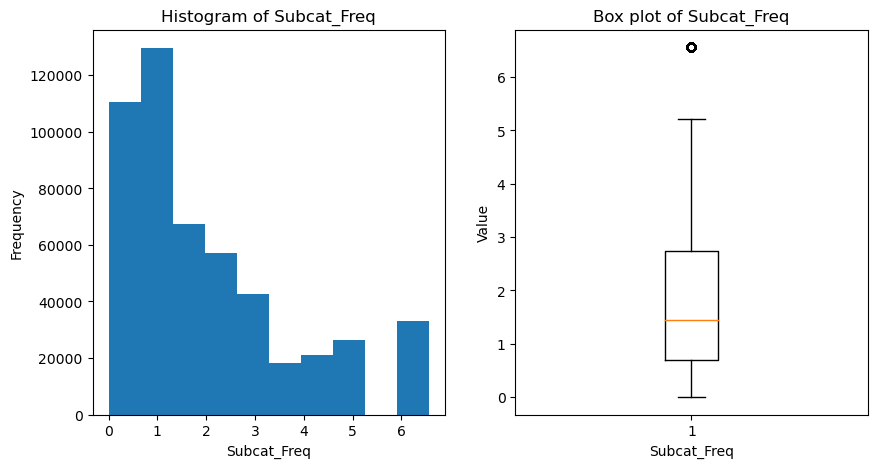

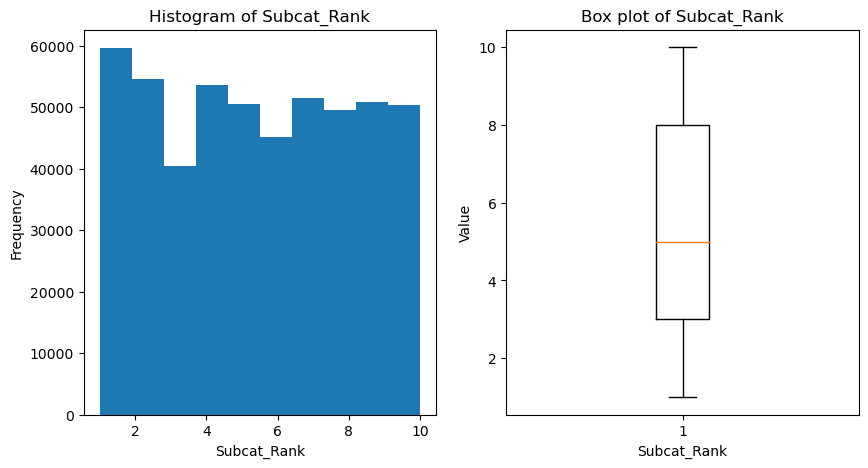

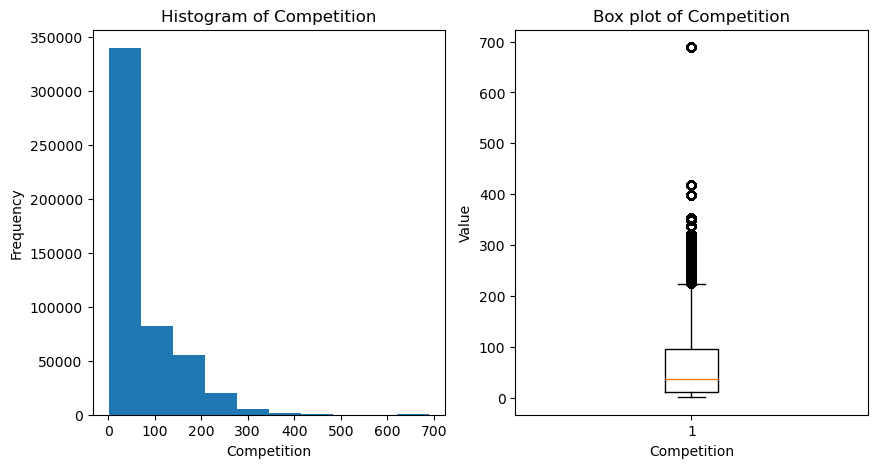

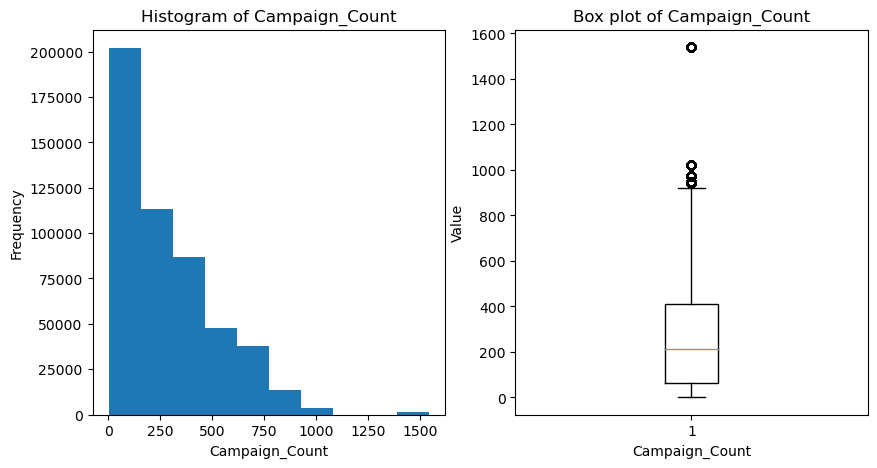

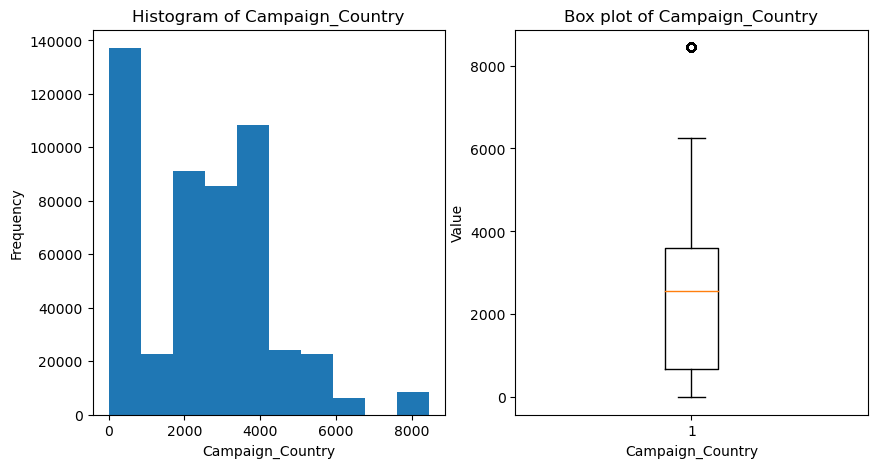

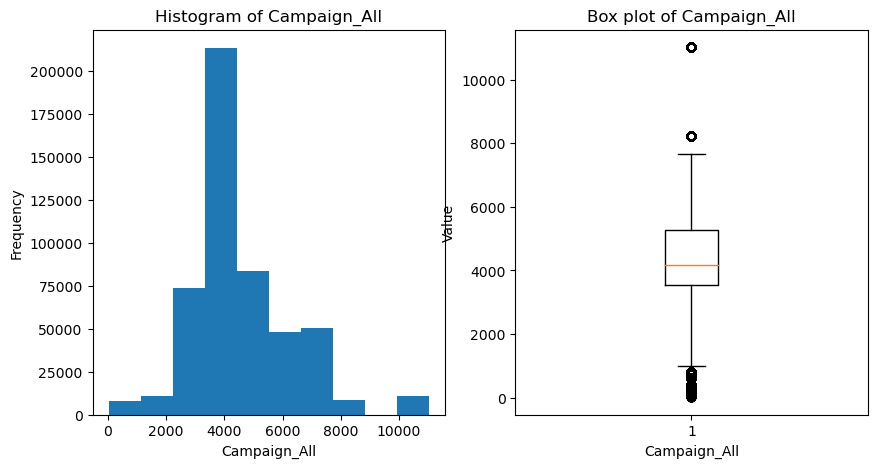

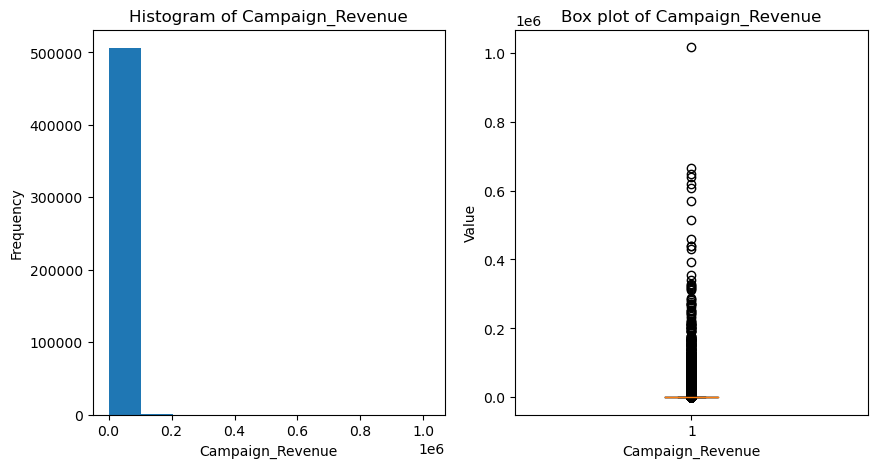

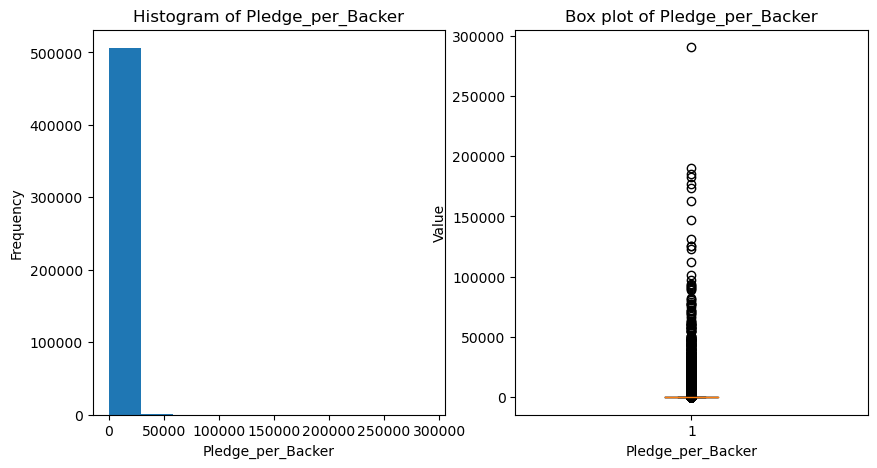

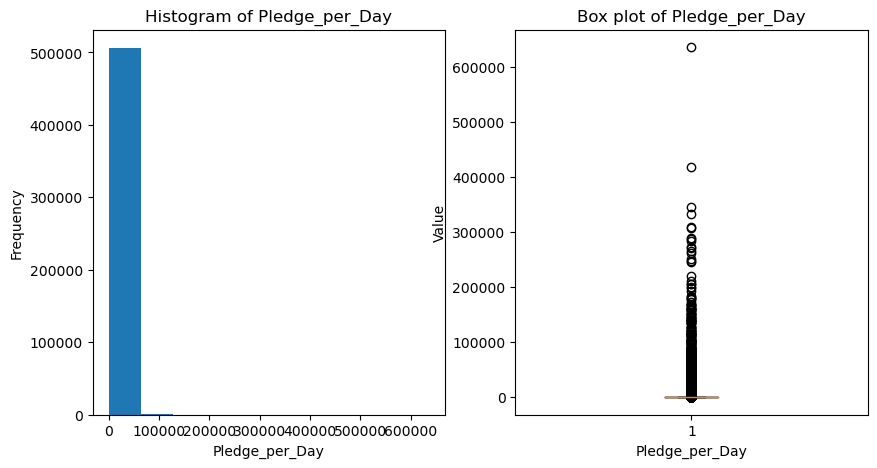

In [47]:
# explore distributions in numeric columns
for column in numeric_columns:
    plot_feature(data, column)

Okay, not all of my numerical features have outliers and not all features need to deal with outliers eg Rank. 

Will explore different outlier method on the data set and choose best one for modelling. Will perform something similar for data normalization

In [46]:
#Function to make copies for exploring ouutliers
def make_multiple_outliers(dataframe, column, copies):
    df_new = pd.concat([dataframe[column]] * copies, axis=1)
    df_new.columns = ['original', 'win1', 'win2', 'win3', 'win4']
    return df_new 

#explore winsorization:
def winsorization(dataframe, lower_limit, upper_limit):
    clipped = dataframe.clip(dataframe.quantile(lower_limit), dataframe.quantile(upper_limit))
    return clipped 

#plot boxplots
def plot_boxplot(dataframe, title):
    fig, axs = plt.subplots(1, len(dataframe.columns), figsize=(20, 5))
    for i, col in enumerate(dataframe.columns):
        axs[i].boxplot(dataframe[col])
        axs[i].set_title(col)
    plt.suptitle(title)
    plt.show()

In [50]:
#make new df for the following columns: Goal, Pledged, Backers, Duration, Goal per day, goal per backer, pledged per day, pledged per backer
goal_df = make_multiple_outliers(data, 'Goal (USD)', 5)
pledged_df = make_multiple_outliers(data, 'Pledged (USD)', 5)
backers_df = make_multiple_outliers(data, 'Backers (#)', 5)
duration_df = make_multiple_outliers(data, 'Duration (days)', 5)
pledged_day = make_multiple_outliers(data, 'Pledge_per_Day', 5)
pledged_backer = make_multiple_outliers(data, 'Pledge_per_Backer', 5)


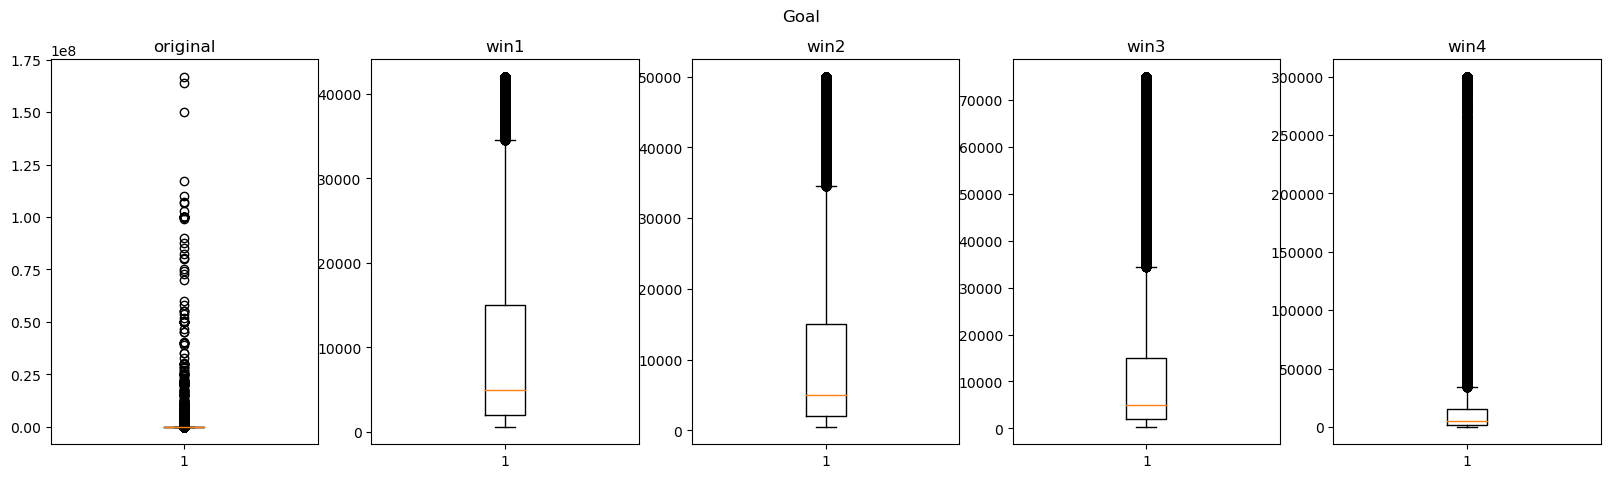

In [51]:
#transform goal
goal_df['win1'] = winsorization(goal_df['win1'], 0.1, 0.9)
goal_df['win2'] = winsorization(goal_df['win2'], 0.075, 0.925)
goal_df['win3'] = winsorization(goal_df['win3'], 0.05, 0.95)
goal_df['win4'] = winsorization(goal_df['win4'], 0.01, 0.99)

#plot box
plot_boxplot(goal_df, 'Goal')


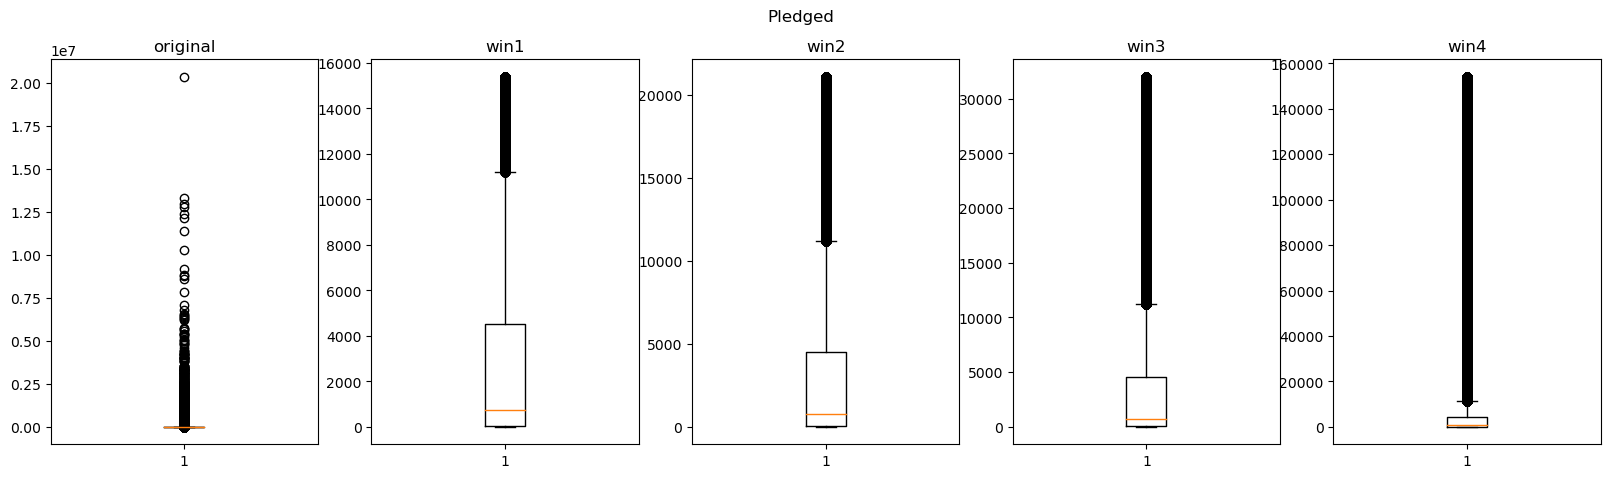

In [52]:
#transform pledged_df
pledged_df['win1'] = winsorization(pledged_df['win1'], 0.1, 0.9)
pledged_df['win2'] = winsorization(pledged_df['win2'], 0.075, 0.925)
pledged_df['win3'] = winsorization(pledged_df['win3'], 0.05, 0.95)
pledged_df['win4'] = winsorization(pledged_df['win4'], 0.01, 0.99)

#plot box plots
plot_boxplot(pledged_df, 'Pledged')

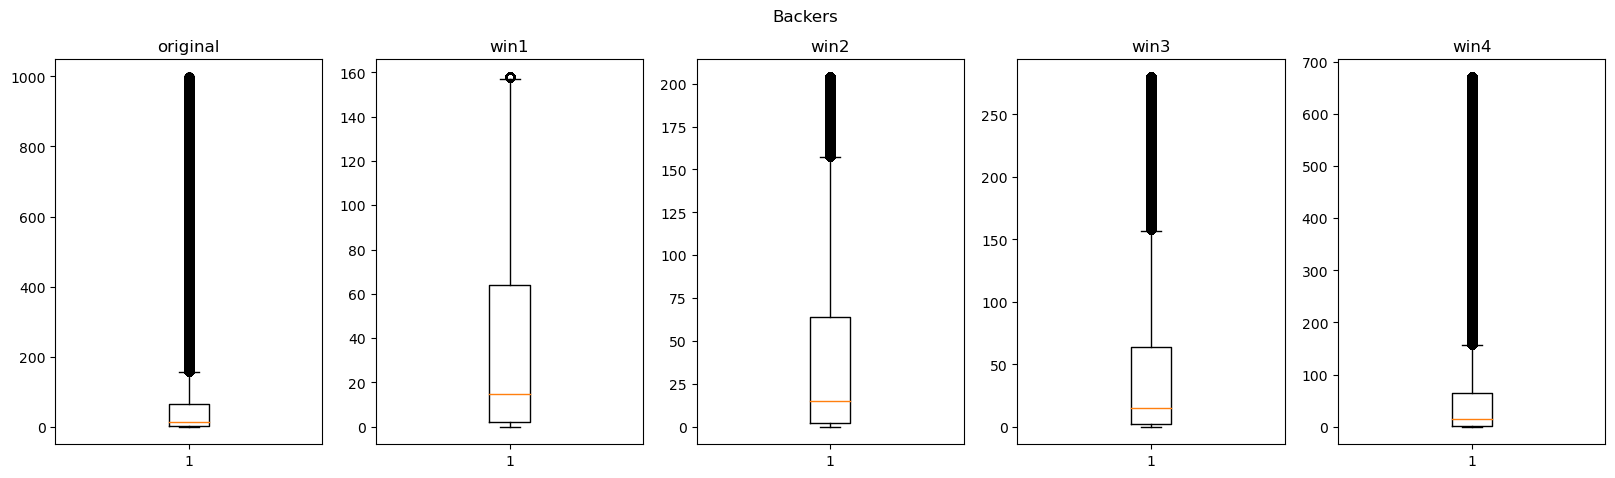

In [53]:
#transform backers
backers_df['win1'] = winsorization(backers_df['win1'], 0.1, 0.9)
backers_df['win2'] = winsorization(backers_df['win2'], 0.075, 0.925)
backers_df['win3'] = winsorization(backers_df['win3'], 0.05, 0.95)
backers_df['win4'] = winsorization(backers_df['win4'], 0.01, 0.99)

#plot boxplot
plot_boxplot(backers_df, 'Backers')


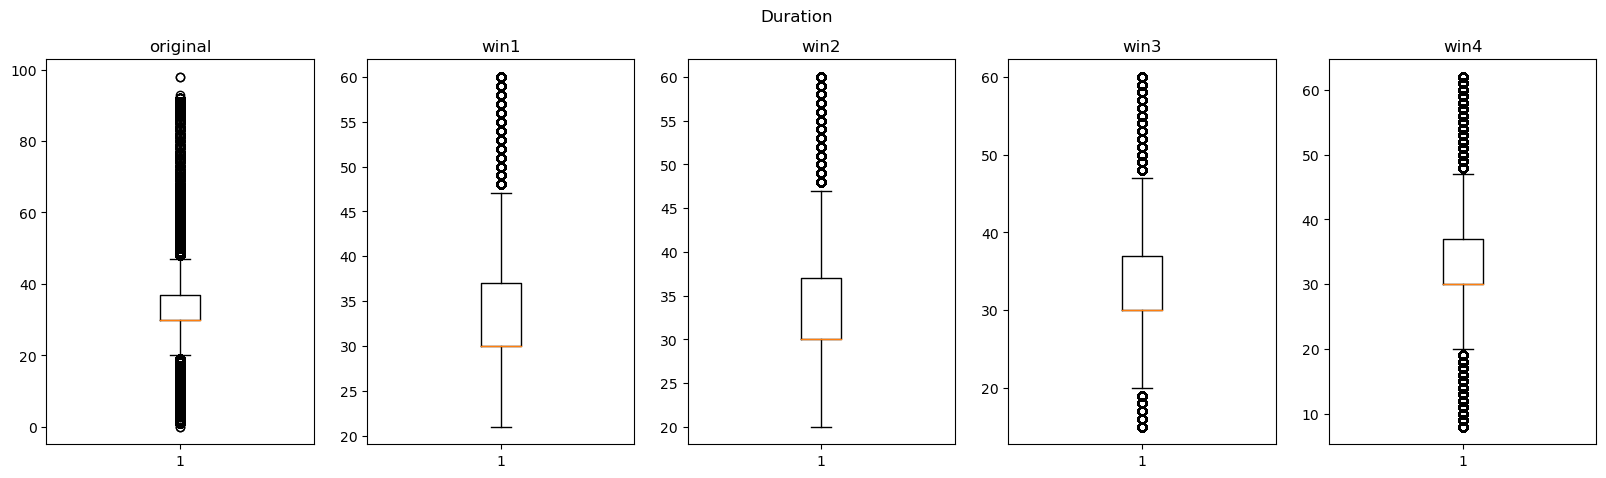

In [54]:
#transform duration
duration_df['win1'] = winsorization(duration_df['win1'], 0.1, 0.9)
duration_df['win2'] = winsorization(duration_df['win2'], 0.075, 0.925)
duration_df['win3'] = winsorization(duration_df['win3'], 0.05, 0.95)
duration_df['win4'] = winsorization(duration_df['win4'], 0.01, 0.99)

#plot box plot
plot_boxplot(duration_df, 'Duration')

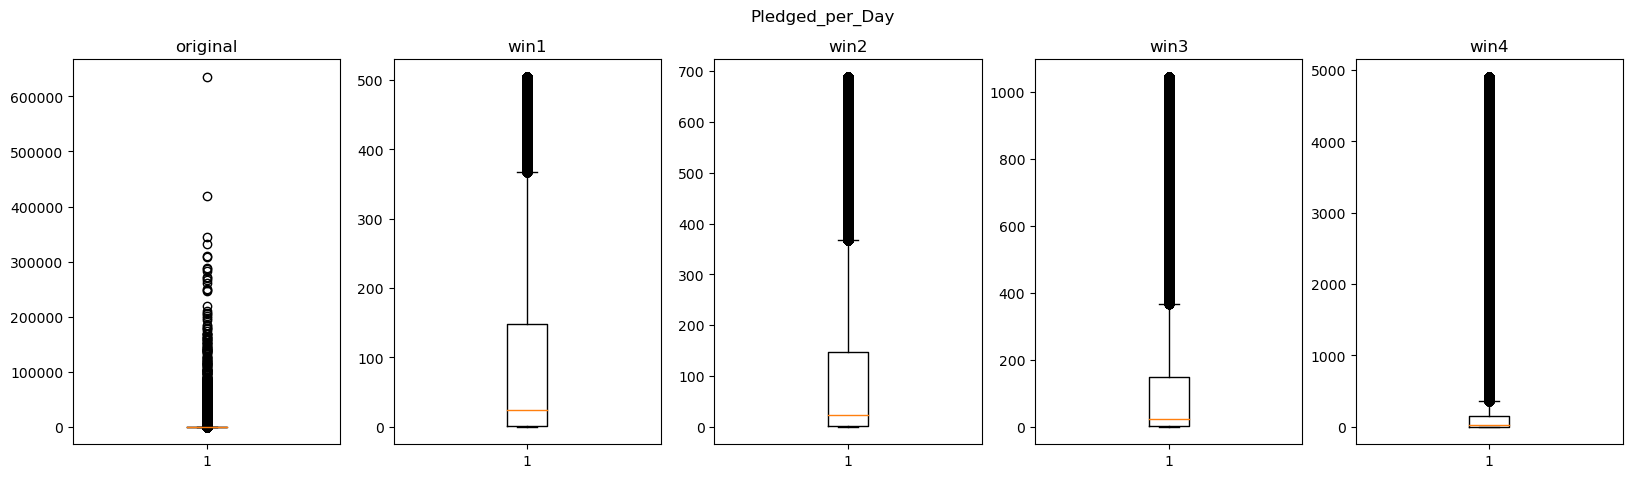

In [55]:
#pledged_day
pledged_day['win1'] = winsorization(pledged_day['win1'], 0.1, 0.9)
pledged_day['win2'] = winsorization(pledged_day['win2'], 0.075, 0.925)
pledged_day['win3'] = winsorization(pledged_day['win3'], 0.05, 0.95)
pledged_day['win4'] = winsorization(pledged_day['win4'], 0.01, 0.99)


plot_boxplot(pledged_day, 'Pledged_per_Day')

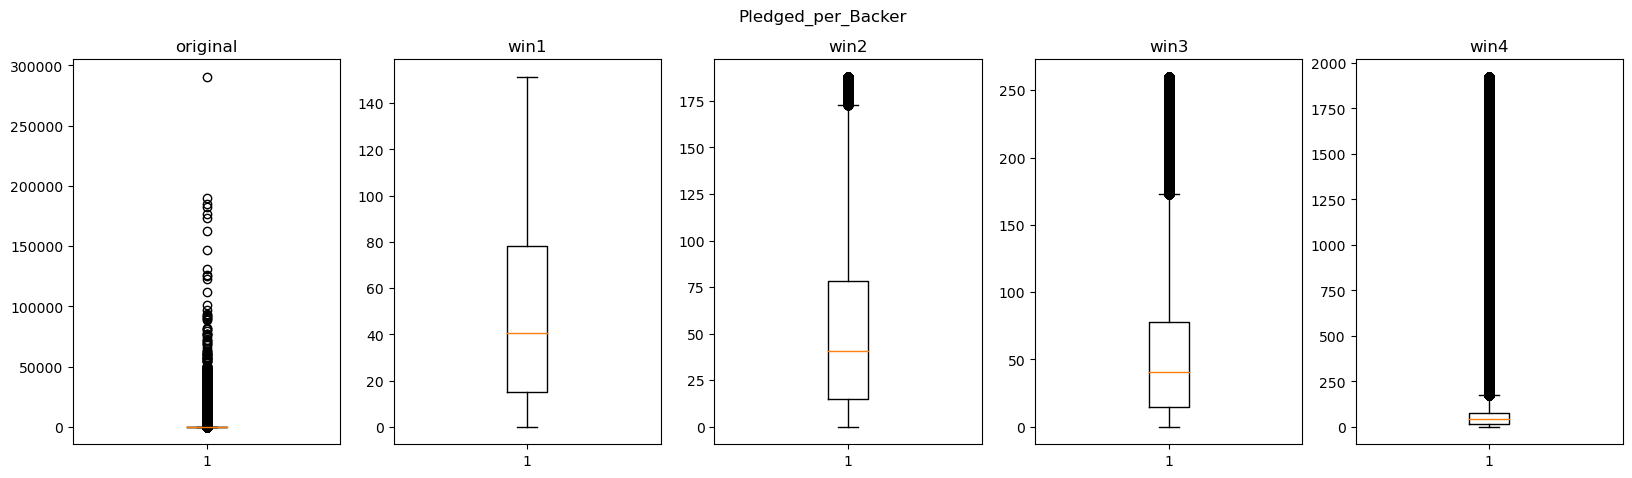

In [56]:
#pledged backer
pledged_backer['win1'] = winsorization(pledged_backer['win1'], 0.1, 0.9)
pledged_backer['win2'] = winsorization(pledged_backer['win2'], 0.075, 0.925)
pledged_backer['win3'] = winsorization(pledged_backer['win3'], 0.05, 0.95)
pledged_backer['win4'] = winsorization(pledged_backer['win4'], 0.01, 0.99)


plot_boxplot(pledged_backer, 'Pledged_per_Backer')


Winsorization with limits of 0.1 and 0.9 appear to be the best so far. Let's explore that in a copy of the data.

In [63]:
#make a data copy

transformed_df = data.copy()

col_to_transform = ['Goal (USD)', 'Pledged (USD)', 'Backers (#)', 'Duration (days)', 'Pledge_per_Day', 'Pledge_per_Backer']

#handle outliers in column
def column_winsorization(dataframe, lower_limit, upper_limit):
    clipped = dataframe.clip(dataframe.quantile(lower_limit), dataframe.quantile(upper_limit))
    return clipped

In [64]:
#winsorize the data
for column in col_to_transform:
    transformed_df[column] = column_winsorization(transformed_df[column], lower_limit=0.1, upper_limit=0.9)

# Normalization

apply outlier technique first then do normalization

include box cox too

In [65]:
from sklearn.preprocessing import QuantileTransformer, PowerTransformer

In [76]:
#assess some methods for dealing with data - treat monetary one similar

#function to add 1 and take np.log10
def log10p(data):
    data = data + 1
    y = np.log10(data)
    return y

#take square root
def take_sqrt(data):
    sqrt = np.sqrt(data)
    return sqrt


# quanitle
def quantile_transformation(data):
    qt = QuantileTransformer(output_distribution='normal', random_state=42)
    qt_data = qt.fit_transform(data.values.reshape(-1, 1))
    return qt_data


#box-cox goes here
#power 
def power_transformation(data):
    pt = PowerTransformer(method='yeo-johnson')
    pt_data = pt.fit_transform(data.values.reshape(-1, 1))
    return pt_data


In [67]:
#transform df
def transform_df(dataframe):
    dataframe['Log_transform'] = log10p(dataframe['Log_transform'])
    dataframe['square_root'] = take_sqrt(dataframe['square_root'])
    dataframe['quantile'] = quantile_transformation(dataframe['quantile'])
    dataframe['power'] = power_transformation((dataframe['power']))
    return dataframe

#function to display histograms pe df in one row
def plot_hist(dataframe, title):
    fig, axs = plt.subplots(1, 5, figsize=(20, 5))
    dataframe.hist(ax=axs)
    plt.suptitle(title)
    plt.show()



In [77]:
#make df with copies of feature to show change of transformation
def make_multiple(dataframe, column, copies):
    df_new = pd.concat([dataframe[column]] * copies, axis=1)
    df_new.columns = ['original', 'Log_transform', 'square_root', 'quantile', 'power']
    return df_new 

In [78]:
#make copies from transformed df
goal_df = make_multiple(transformed_df, 'Goal (USD)', 5)
pledged_df = make_multiple(transformed_df, 'Pledged (USD)', 5)
backers_df = make_multiple(transformed_df, 'Backers (#)', 5)
duration_df = make_multiple(transformed_df, 'Duration (days)', 5)
pledged_day = make_multiple(transformed_df, 'Pledge_per_Day', 5)
pledged_backer = make_multiple(transformed_df, 'Pledge_per_Backer', 5)


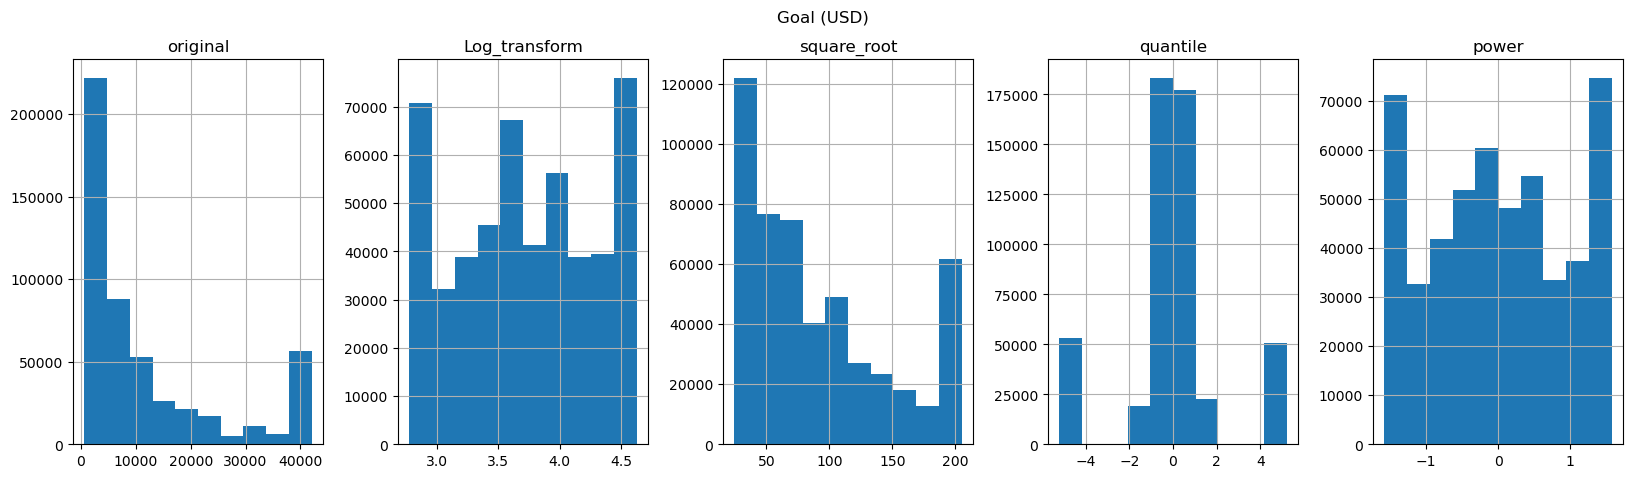

In [79]:
#transforma goal_df
goal_df['Log_transform'] = log10p(goal_df['Log_transform'])
goal_df['square_root'] = take_sqrt(goal_df['square_root'])
goal_df['quantile'] = quantile_transformation(goal_df['quantile'])
goal_df['power'] = power_transformation((goal_df['power']))

#plot goal_df
plot_hist(goal_df, 'Goal (USD)')

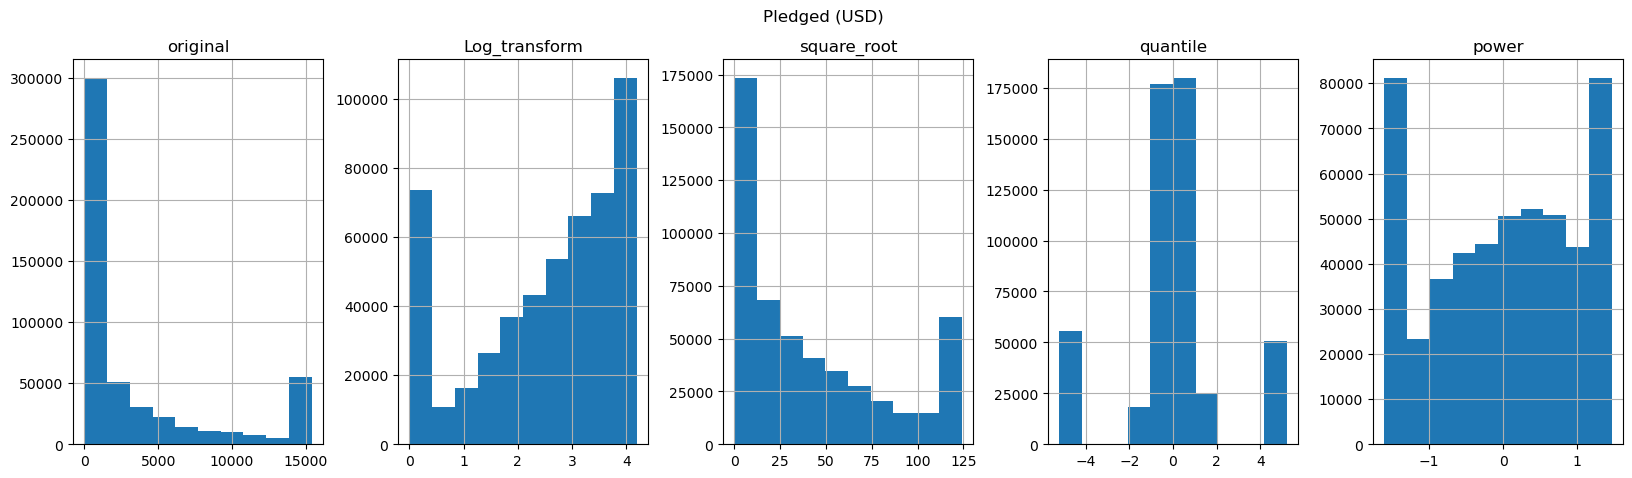

In [80]:
#transform pledged_df
pledged_df['Log_transform'] = log10p(pledged_df['Log_transform'])
pledged_df['square_root'] = take_sqrt(pledged_df['square_root'])
pledged_df['quantile'] = quantile_transformation(pledged_df['quantile'])
pledged_df['power'] = power_transformation((pledged_df['power']))

#plot pledged_df
plot_hist(pledged_df, 'Pledged (USD)')

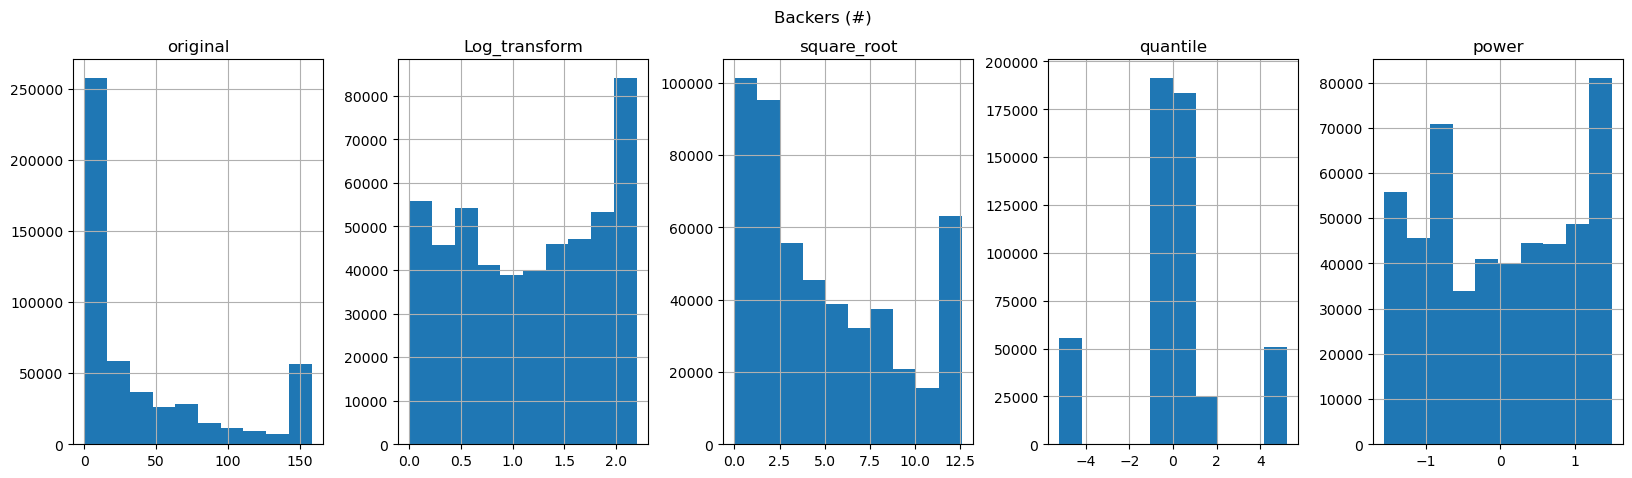

In [81]:
#backers transformation
backers_df['Log_transform'] = log10p(backers_df['Log_transform'])
backers_df['square_root'] = take_sqrt(backers_df['square_root'])
backers_df['quantile'] = quantile_transformation(backers_df['quantile'])
backers_df['power'] = power_transformation((backers_df['power']))


#backers hist
plot_hist(backers_df, 'Backers (#)')

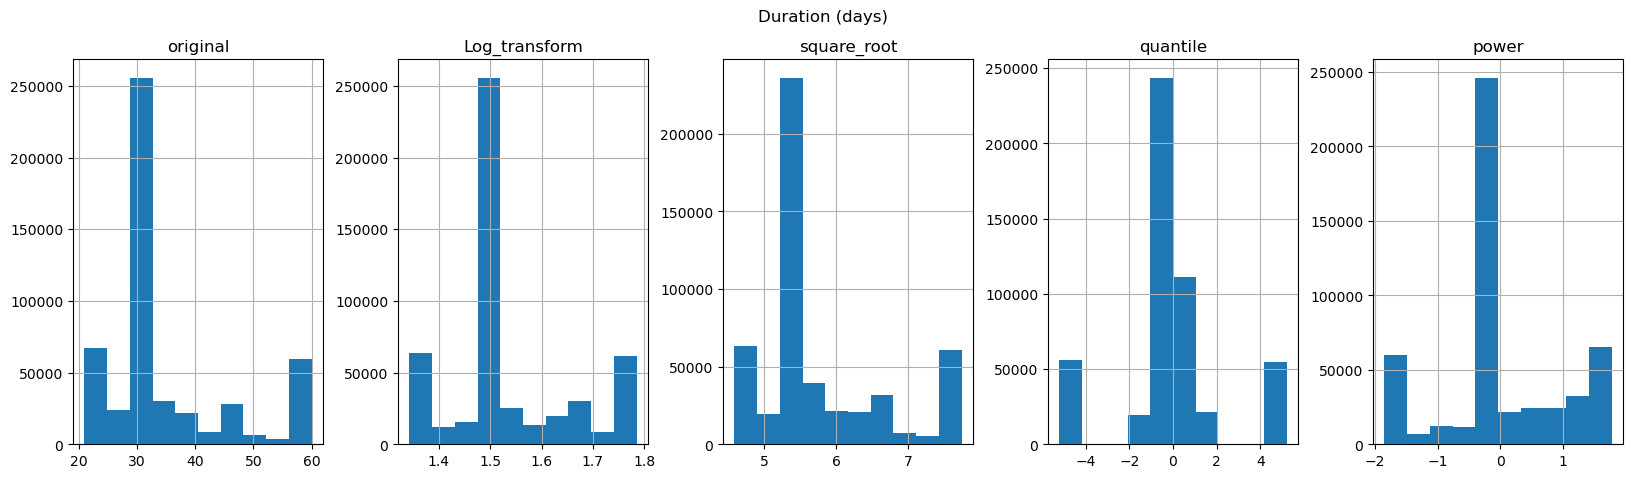

In [82]:
#duration transformation
duration_df['Log_transform'] = log10p(duration_df['Log_transform'])
duration_df['square_root'] = take_sqrt(duration_df['square_root'])
duration_df['quantile'] = quantile_transformation(duration_df['quantile'])
duration_df['power'] = power_transformation((duration_df['power']))


#duration hist
plot_hist(duration_df, 'Duration (days)')

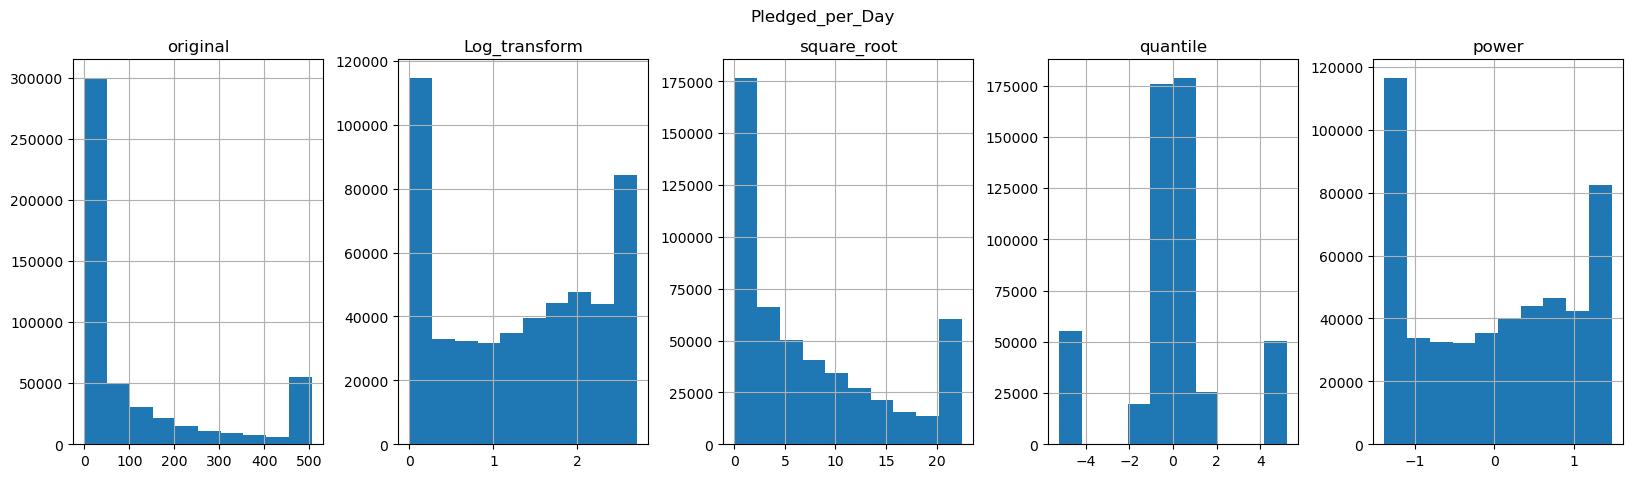

In [83]:
#pledged day transformation
pledged_day['Log_transform'] = log10p(pledged_day['Log_transform'])
pledged_day['square_root'] = take_sqrt(pledged_day['square_root'])
pledged_day['quantile'] = quantile_transformation(pledged_day['quantile'])
pledged_day['power'] = power_transformation((pledged_day['power']))

#pledged day
plot_hist(pledged_day, 'Pledged_per_Day')

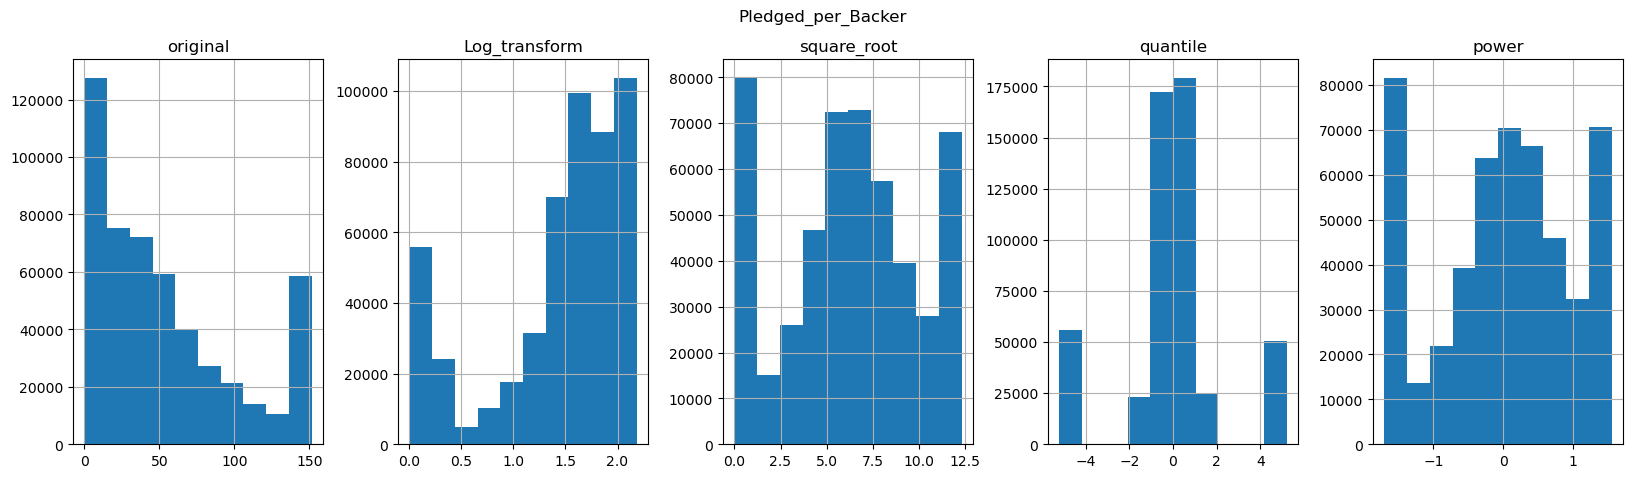

In [84]:
#pledged backer transform
pledged_backer['Log_transform'] = log10p(pledged_backer['Log_transform'])
pledged_backer['square_root'] = take_sqrt(pledged_backer['square_root'])
pledged_backer['quantile'] = quantile_transformation(pledged_backer['quantile'])
pledged_backer['power'] = power_transformation((pledged_backer['power']))

#pledged backer
plot_hist(pledged_backer, 'Pledged_per_Backer')

So it appears Quantile Transformer works best for the normalization from a visual perspective.

In [85]:
#perform transformation on transformed df

for column in col_to_transform:
    transformed_df[column] = quantile_transformation(transformed_df[column])


**Correlation** after dealing with outliers and normalizing data

In [86]:
#make copy of data
factorized_1 = data.copy()
#make copy of 
factorized_2 = transformed_df.copy()

In [87]:
factorized_1.columns

Index(['Category', 'Subcategory', 'Project_Country', 'Launched', 'Deadline',
       'Project_Currency', 'Goal (USD)', 'Pledged (USD)', 'Backers (#)',
       'Status', 'Duration (days)', 'Year', 'Month', 'Subcat_Freq',
       'Subcat_Rank', 'Competition', 'Campaign_Count', 'Campaign_Country',
       'Campaign_All', 'Campaign_Revenue', 'Pledge_per_Backer',
       'Pledge_per_Day'],
      dtype='object')

In [88]:
factorized_2.columns

Index(['Category', 'Subcategory', 'Project_Country', 'Launched', 'Deadline',
       'Project_Currency', 'Goal (USD)', 'Pledged (USD)', 'Backers (#)',
       'Status', 'Duration (days)', 'Year', 'Month', 'Subcat_Freq',
       'Subcat_Rank', 'Competition', 'Campaign_Count', 'Campaign_Country',
       'Campaign_All', 'Campaign_Revenue', 'Pledge_per_Backer',
       'Pledge_per_Day'],
      dtype='object')

In [89]:
#drop some columns
factorized_1 = factorized_1.drop(['Subcat_Freq', 'Launched', 'Deadline', 'Project_Currency'], axis=1)
factorized_2 = factorized_2.drop(['Subcat_Freq', 'Launched', 'Deadline', 'Project_Currency'], axis=1)

In [90]:
#category list of features
cat_list = list(factorized_1.select_dtypes(include='object'))
cat_list

['Category', 'Subcategory', 'Project_Country', 'Status', 'Month']

In [91]:
#factorize categorical data for raw data
for col in cat_list:
    factorized_1[col] = pd.factorize(factorized_1[col].values)[0]
    

In [92]:
#factorize categorical data for transformed data
for col in cat_list:
    factorized_2[col] = pd.factorize(factorized_2[col].values)[0]

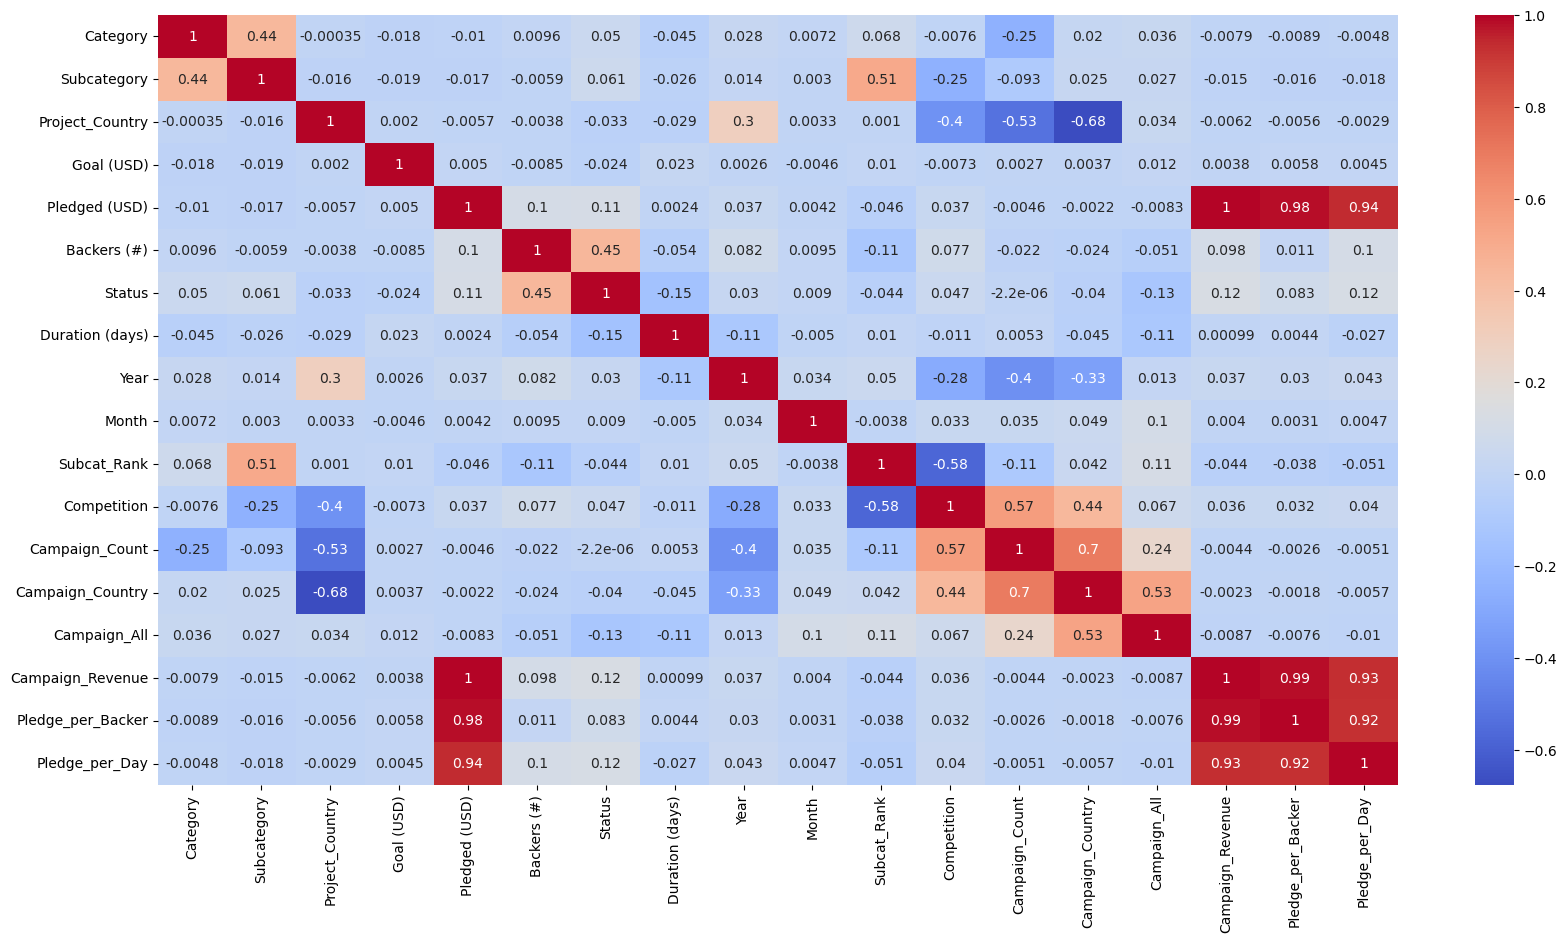

In [93]:
#check correlations for raww data
make_heatmap(factorized_1, (20, 10))

*For raw data*
Target is Status: Relevant features
- Pledged has a low correlation
- Backers has a mild correlation
- Duration has low negative correlation
- Campaign_all has a low negative correlation
- Campaign revenue has a low correlation - this will not be included as it for a different problem
- pledge per day has a low correlation 

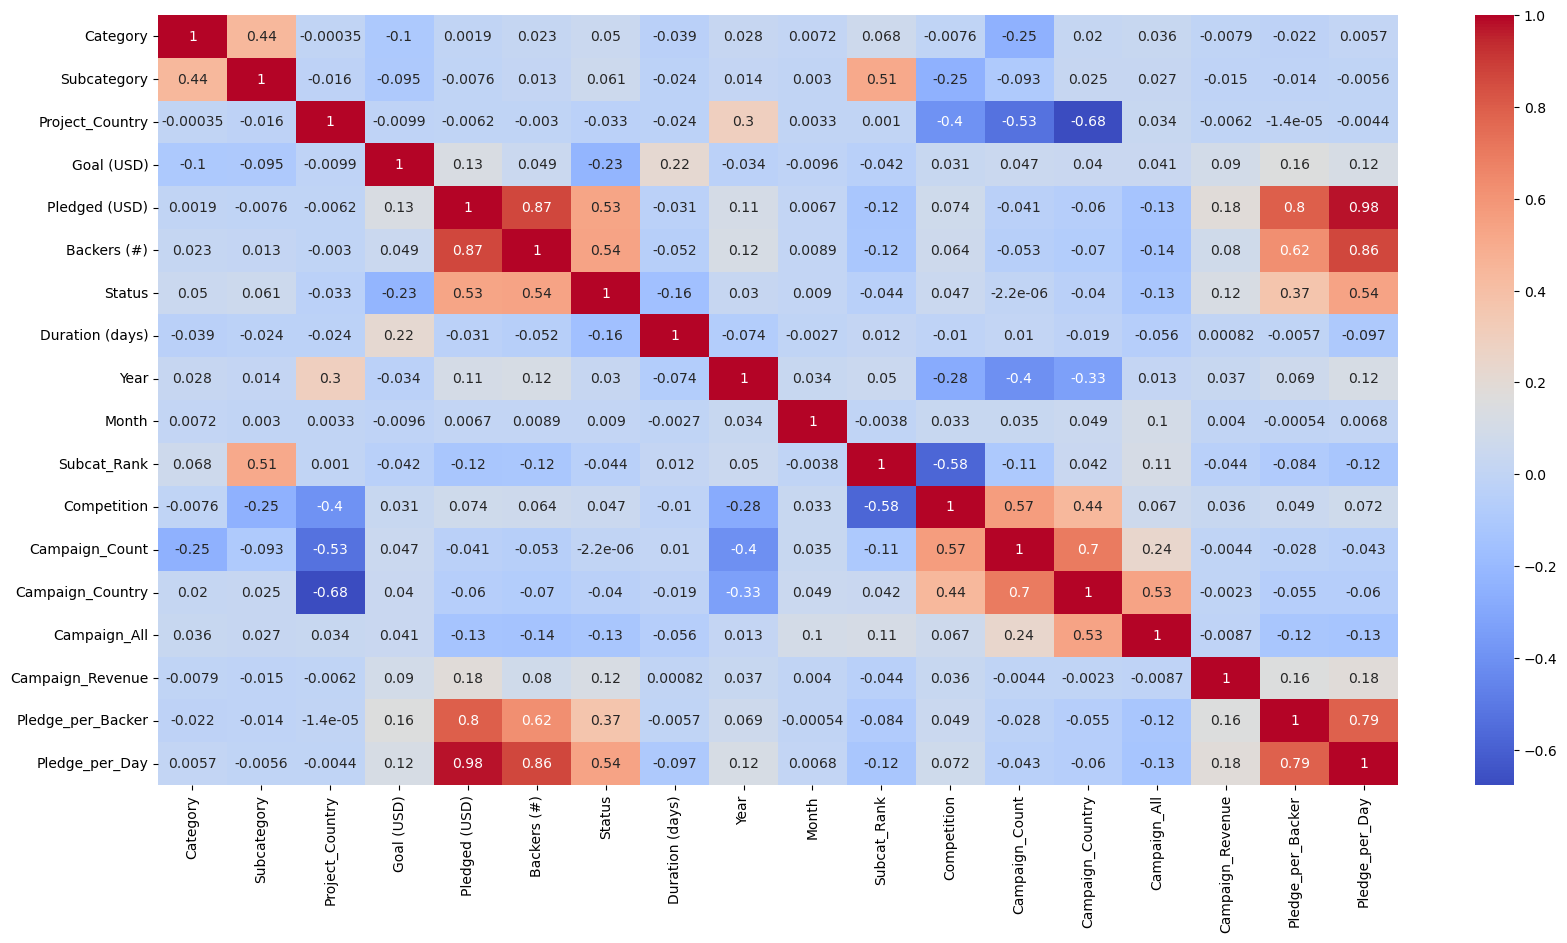

In [94]:
#check correlations for transformed data
make_heatmap(factorized_2, (20, 10))

*For Transformed Data*
- Goal has a low - mild negative correlation
- Pledged has a mild correlation
- Backers has a mild correlation
- Duration (days) has a low correlation
- Campaign_all has a low negative correlation
- Campaign Revenue has a low correlation - this is for another problem
- Pledge_per day and per backer have mild correlations